<a href="https://colab.research.google.com/github/jorgg3/Proyecto-3/blob/main/Ejercicio_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Ajuste por Mínimos Cuadrados y Factorización QR
**Problemas Computacionales**\
Alumno: Martínez de la Cruz José Jorge\
Profesor: César Carreón Otañez\
Ayudante:  Jesús Iván Coss Calderón

21) Resolver\
a) Implementar el método de Gram-Schmidt para generar la matriz ortogonal $Q$ cuyas columnas forman una base ortogonal para el espacio columna de la Matriz $H$
de Hilbert cuyas entras están dadas por
$$
h_{ij} = \dfrac {1}{i + j - 1}, \quad n = 2, \dots, 12
$$

Primero generemos la matríz

In [15]:
import numpy as np

In [29]:
def H(n): #Definimos la matríz
    H = np.zeros((n, n)) #Inciiamos una matríz de 0 con tamaño n
    for i in range(n): #Damos la condición de llenado
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)  # Elemento h_ij = 1 / (i + j + 1)
    return H

Veamos el ejemplo para n = 2

In [28]:
def QR(A):
    """
    Realiza la descomposición QR de una matriz A utilizando el método de Gram-Schmidt.

    Parámetros:
    A (numpy.ndarray): Matriz de entrada de tamaño (m x n), donde m es el número de filas y n el número de columnas.

    Retorna:
    Q (numpy.ndarray): Matriz ortogonal de tamaño (m x n), tal que Q^T * Q = I.
    R (numpy.ndarray): Matriz triangular superior de tamaño (n x n).

    El resultado satisface la relación A = Q * R, donde:
    - Q es una matriz ortogonal (Q^T * Q = I).
    - R es una matriz triangular superior.
    """

    # Inicialización de las matrices Q y R
    Q = np.empty_like(A)  # Matriz de salida Q, tendrá las mismas dimensiones que A
    R = np.zeros([A.shape[1], A.shape[1]])  # Matriz cuadrada R de tamaño n x n
    vi = np.zeros([A.shape[1]])  # Vector auxiliar vi

    # Iteración sobre las columnas de A
    for i in range(A.shape[1]):
        # Comienza con el vector de la columna i de A
        vi = A[:, i]

        # Proceso de ortogonalización de Gram-Schmidt
        for j in range(i):
            # Calculamos la proyección de vi sobre los vectores Q anteriores
            R[j, i] = np.dot(Q[:, j].T, vi)  # Proyección de vi sobre Q[:, j]
            # Restamos la proyección de vi para mantener la ortogonalidad
            vi = vi - R[j, i] * Q[:, j]

        # Normalizamos el vector vi para obtener un vector unitario
        R[i, i] = np.linalg.norm(vi, 2)  # Norma de vi, la longitud del vector
        Q[:, i] = vi / R[i, i]  # Normalizamos para obtener el i-ésimo vector ortonormal de Q

    # Retorna las matrices Q y R
    return Q, R

In [30]:
H2 = H(2)
H2

array([[1.        , 0.5       ],
       [0.5       , 0.33333333]])

In [8]:
print(QR(H)[0])

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


Como medida de calidad en los resultados (específicamente la perdida de ortogonalidad), graficar la cantidad
$$
- \log_{10} \left( \| I - Q^T Q \| \right)
$$
la cual puede ser interpretada como los “dígitos de precisión”, para cada método como función de n.

In [9]:
q2 = -np.log10(np.linalg.norm(np.eye(2) - QR(H)[0].T @ QR(H)[0]))
q2

14.631443679590733

Realicemos el vector en función de "n" que usaremos para gráficar

In [31]:
Y = []
for i in range(2, 13):
    Hi= H(i)
    q = -np.log10(np.linalg.norm(np.eye(i) - QR(Hi)[0].T @ QR(Hi)[0]))
    Y.append(q)

In [33]:
pip install matplotlib


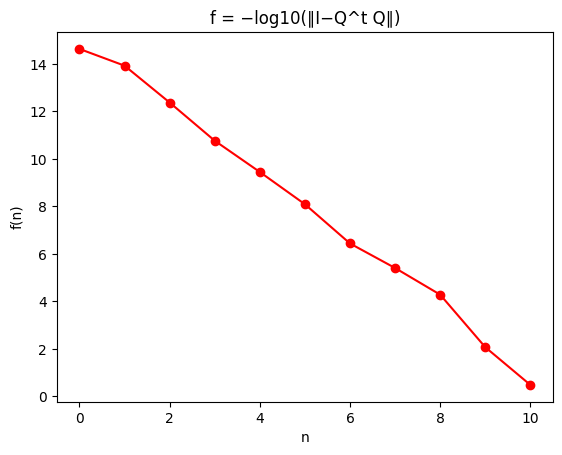

In [40]:
import matplotlib.pyplot as plt

plt.plot(Y, marker='o', linestyle='-', color='r')
plt.title('f = −log10(∥I−Q^t Q∥)')
plt.xlabel('n')
plt.ylabel('f(n)')

# Mostrar
plt.show()


Lo que podemos concluir de ésta gráfica es que a mayor tamaño, la ortogonalidad disminuye :(

Como segundo método de comparación, dada la matriz $Q$ obtenida del procedimiento Clásico de Gram-Schmidt, volver a calcular una nueva $Q$ con la anterior, es decir, aplicar dos veces el método. Graficar con (2) la medida de ortogonalidad creada.

In [45]:
Y1 = []  # Lista para almacenar los resultados de cada iteración

# Iterar sobre los tamaños de matrices de Hilbert de 2x2 hasta 12x12
for i in range(2, 13):

    # Generar la matriz de Hilbert de tamaño i x i
    Hi = H(i)

    # Realizar la factorización QR de la matriz Hi, obteniendo la matriz Q
    K = QR(QR(Hi)[0])

    # Calcular el valor de la expresión logaritmica:
    # -np.log10(np.linalg.norm(np.eye(i) - K[0].T @ K[0]))
    # Donde K[0] es la matriz Q después de la factorización QR
    q = -np.log10(np.linalg.norm(np.eye(i) - K[0].T @ K[0]))

    # Agregar el valor calculado a la lista Y
    Y1.append(q)


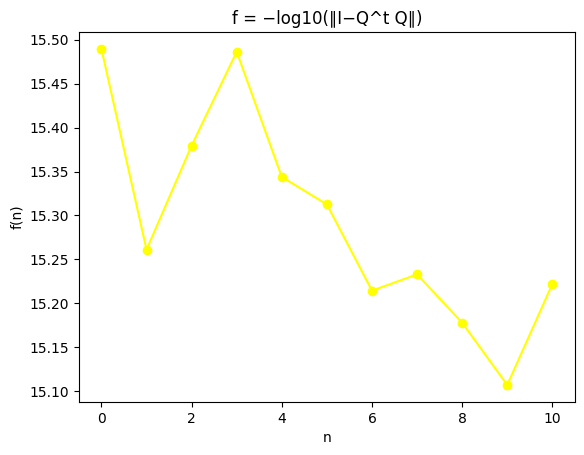

In [46]:
import matplotlib.pyplot as plt

plt.plot(Y1, marker='o', linestyle='-', color='yellow')
plt.title('f = −log10(∥I−Q^t Q∥)')
plt.xlabel('n')
plt.ylabel('f(n)')

# Mostrar el gráfico
plt.show()


Ahora vemos que aunque los valores de ortogonalidad se mantienen en el intervalo $(15, 16)$, mientras el tamaño de la matríz aumenta, la ortogonalidad sigue disminuyendo

b) Repetir a) usando la factorización de Householder para poner $H = QR$. Calcular la cantidad pedida en la ecuaci ́on (2) y comparar nuevamente con los dos anteriores.

In [48]:
import numpy.linalg as LA

def Householder(A):
    """
    Realiza la descomposición QR de una matriz A utilizando el método de Householder.

    Parámetros:
    A (numpy.ndarray): Matriz de entrada de tamaño (m, n) que se desea descomponer.
                        La matriz A debe tener dimensiones m x n.

    Retorna:
    tuple: Una tupla (Q, R) donde:
        - Q (numpy.ndarray): Matriz ortogonal (m x m) tal que Q^T * Q = I.
        - R (numpy.ndarray): Matriz triangular superior (m x n) que contiene los coeficientes de la factorización QR.

    Descripción:
    El método de Householder se utiliza para descomponer una matriz A de tamaño m x n en una matriz ortogonal Q y una matriz triangular superior R tal que:

    A = Q * R

    El algoritmo se basa en la idea de aplicar reflexiones (matrices de Householder) para convertir las columnas de A en un sistema de vectores ortogonales.

    Procedimiento:
    1. Se iteran las columnas de la matriz A.
    2. Para cada columna, se genera un vector de Householder que "refleja" la columna actual hacia una dirección específica.
    3. Se actualizan las matrices \( Q \) y \( A \) en cada paso.
    4. La matriz \( Q \) se obtiene como el producto de las matrices de Householder acumuladas, mientras que la matriz \( A \) se va transformando en la matriz triangular superior \( R \).

    La función devuelve las matrices Q (ortogonal) y R (triangular superior) que cumplen la relación A = Q * R.

    Notas:
    - El vector xi es la copia de la columna de A a partir del elemento i-ésimo.
    - El vector ui es el vector de Householder, que es el eje de la reflexión.
    - El vector vi es normalizado para asegurar que la reflexión sea correcta.
    - Se actualiza la matriz \( A \) y la matriz acumulativa \( Q \) en cada iteración.
    """

    # Inicialización: Q es la matriz identidad y se va acumulando
    Q = np.eye(len(A))

    # Número de columnas de A
    n = A.shape[1]

    # Iterar sobre cada columna
    for i in range(n):
        # Inicializar xi, un vector con ceros
        xi = np.zeros(len(A))

        # Tomar el subvector de la columna de A a partir del i-ésimo índice
        xi[i:] = A[:, i][i:]

        # Calcular la norma de xi
        norm_x = LA.norm(xi)

        # Crear un vector unitario ei
        ei = np.zeros(len(A))
        ei[i] = 1.0

        # Generar el vector ui de Householder
        ui = xi + np.sign(A[i, i]) * norm_x * ei

        # Normalizar el vector ui para obtener vi
        vi = ui / LA.norm(ui)

        # Reshape de vi a un vector columna
        vi = vi.reshape(-1, 1)

        # Crear la matriz de Householder H
        H = np.eye(len(A)) - 2 * vi @ vi.T

        # Actualizar la matriz A
        A = H @ A

        # Actualizar la matriz Q
        Q = Q @ H

    return Q, A

In [51]:
Y2 = []
for i in range(2, 13):
    Hi= H(i)
    K = Householder(Hi)
    q = -np.log10(np.linalg.norm(np.eye(i) - K[0].T @ K[0]))
    Y2.append(q)

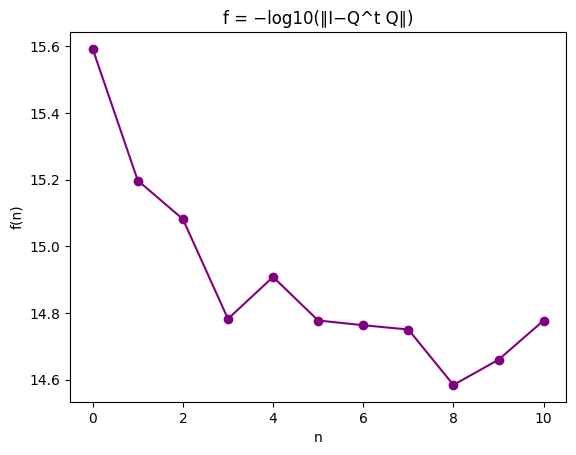

In [52]:
import matplotlib.pyplot as plt

plt.plot(Y2, marker='o', linestyle='-', color='purple')
plt.title('f = −log10(∥I−Q^t Q∥)')
plt.xlabel('n')
plt.ylabel('f(n)')

# Mostrar el gráfico
plt.show()

Los datos son muy parecidos a los obtenidos al aplicar dos veces la ortogonalización de Graham-Smitchd, lo que nos dice que es un mejor método pero no indica que deja de caer la ortogonalidad

c) Una manera de calcular una base ortogonal es usando las ecuaciones normales. Al formar la matriz de las ecuaciones normales y calcular su factorización de Cholesky $( A^T A = L L^T )$,
tenemos:
$$
I = L^{-1} (A^T A) L^{-T} = (A L^{-T})^T (A L^{-T})
$$

es decir,

$$
Q = A L^t
$$

Es ortogonal y su espacio columna es el mismo que el de $A$. Repetir el
procedimiento anterior usando la matriz $Q$ obtenida arriba. Graficar los resultados comparando con los obtenidos por Gram-Schmidt.


In [53]:
def Cholesky(A):
    """
    Realiza la descomposición de Cholesky de una matriz simétrica y definida positiva.

    La descomposición de Cholesky de una matriz A se expresa como:
    A = L * L^T
    donde:
        - A es la matriz de entrada (simétrica y definida positiva).
        - L es una matriz triangular inferior (con ceros sobre la diagonal).

    Parámetros:
    A (numpy.ndarray): Matriz cuadrada simétrica y definida positiva de tamaño n x n.

    Retorna:
    L (numpy.ndarray): Matriz triangular inferior de tamaño n x n tal que A = L * L^T.

    Excepciones:
    Si la matriz A no es simétrica o definida positiva, este algoritmo puede fallar
    o devolver resultados incorrectos.

    El algoritmo sigue el siguiente procedimiento:
    1. Inicializa una matriz L de ceros de las mismas dimensiones que A.
    2. Calcula los elementos de la matriz triangular inferior L usando la fórmula de Cholesky.
    3. La diagonal de L es calculada con la raíz cuadrada de los elementos de A.
    4. Los elementos fuera de la diagonal se calculan usando las sumas de productos previamente computadas.

    """
    # Determina el tamaño de la matriz A
    n = len(A)

    # Crea una matriz L de ceros del mismo tamaño que A
    L = np.zeros_like(A)

    # Recorre las filas y columnas de A para calcular los elementos de L
    for i in range(n):
        for j in range(i + 1):
            # Si estamos en la diagonal principal
            if i == j:
                # Calculamos la suma de los cuadrados de los elementos previos de la fila
                sum = 0.0
                for k in range(j):
                    sum += L[j][k] * L[j][k]
                # La raíz cuadrada del valor en A[j][j] menos la suma anterior da el valor de L[j][j]
                L[j][j] = np.sqrt(A[j][j] - sum)
            else:
                # Si estamos en la parte inferior de la matriz (por debajo de la diagonal)
                sum = 0.0
                for k in range(j):
                    sum += L[i][k] * L[j][k]
                # Usamos la fórmula para calcular los valores fuera de la diagonal
                L[i][j] = (A[i][j] - sum) / L[j][j]

    return L

In [55]:
def LAQ(A):
    L = Cholesky(A.T @ A)  # Calcula la factorización de Cholesky de A^T * A
    Q = A @ L.T  # Obtiene la matriz ortogonal Q usando la factorización de Cholesky
    return Q

In [59]:
Y3 = []
for i in range(2, 13):
    Hi= H(i)
    K = LAQ(Hi)
    q = -np.log10(np.linalg.norm(np.eye(i) - K.T @ K))
    Y3.append(q)

<ipython-input-53-dbf978d11f18>:44: RuntimeWarning: invalid value encountered in sqrt
  L[j][j] = np.sqrt(A[j][j] - sum)


In [61]:
Y3

[-0.1653058882905161,
 -0.3701882877449364,
 -0.48343502922053483,
 -0.5593074788050555,
 -0.6153206003607528,
 -0.6592057935896224,
 -0.6950030305750963,
 -0.7250662227722142,
 nan,
 nan,
 nan]

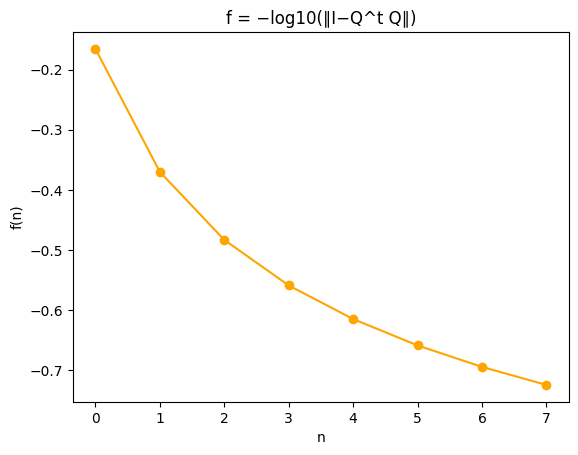

In [62]:
import matplotlib.pyplot as plt

plt.plot(Y3, marker='o', linestyle='-', color='orange')
plt.title('f = −log10(∥I−Q^t Q∥)')
plt.xlabel('n')
plt.ylabel('f(n)')

# Mostrar el gráfico
plt.show()

En este caso, el coeficiente de ortogonalidad desde un inicio fue muy bajo.

d) ¿Se puede dar una explicación de la calidad de los resultados obtenidos por los distintos métodos?
Sí, las matríces de Hilbert tienen la particularidad  de ser ejemplos canónicos de matrices mal condicionadas, siendo notoriamente difíciles de usar en computación numérica. El número de condición del $n×n$ Hilbert matriz crece como ${\displaystyle O \left(\left(1+{\sqrt {2}}\right)^{4n}/{\sqrt {n}}\right)}$. [1]

La característica esencial de esta matriz es que su determinante se va aproximando a cero cuando el orden de la misma va en aumento. Mas formalmente se puede expresar lo anterior diciendo:
$$
\lim _{n → ∞} det(H(n)) = 0
$$
Esta particularidad hace que el calculo de su inversa se sumamente dificultoso a medida de que aumente el orden la matriz a raíz de que cada vez dicha matriz esta mas cerca de ser singular. [2]

[1] Academia Lab. (2024). Matriz de Hilbert. Enciclopedia. Revisado el 16 de noviembre del 2024. https://academia-lab.com/enciclopedia/matriz-de-hilbert/ \\

[2] Oviedo, J. La Matriz de Hilbert y su Inversa – Cálculo por medio de Maple, Mathemática,  Gauss, Matlab y Macros en Excel. Recuperado el 16 de noviembre de 2024 de: https://studylib.es/doc/4676705/la-matriz-de-hilbert-y-su-inversa-%E2%80%93-c%C3%A1lculo-por-medio-de-...